In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())


'2019-11-12 10:05:27.566372'

In [2]:
vostok = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/climate/vostok_cores.csv', skiprows=20)

In [3]:
vostok_T = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/climate/vostok_temperature.csv', skiprows=110)

In [4]:
vostok_T.head()

,Depth corrected,Ice age (GT4),deut,deltaTS
0,0,0,-438.0,0.0
1,1,17,-438.0,0.0
2,2,35,-438.0,0.0
3,3,53,-438.0,0.0
4,4,72,-438.0,0.0


In [5]:
vostok_T.columns

Index(['Depth corrected', 'Ice age (GT4)', 'deut', 'deltaTS'], dtype='object')

In [19]:
vostok_T

,Depth corrected,Ice age (GT4),deut,deltaTS
0,0,0,-438.00,0.00
1,1,17,-438.00,0.00
2,2,35,-438.00,0.00
3,3,53,-438.00,0.00
4,4,72,-438.00,0.00
5,5,91,-438.00,0.00
6,6,110,-438.00,0.00
7,7,129,-438.00,0.00
8,8,149,-442.90,-0.81
9,9,170,-437.90,0.02


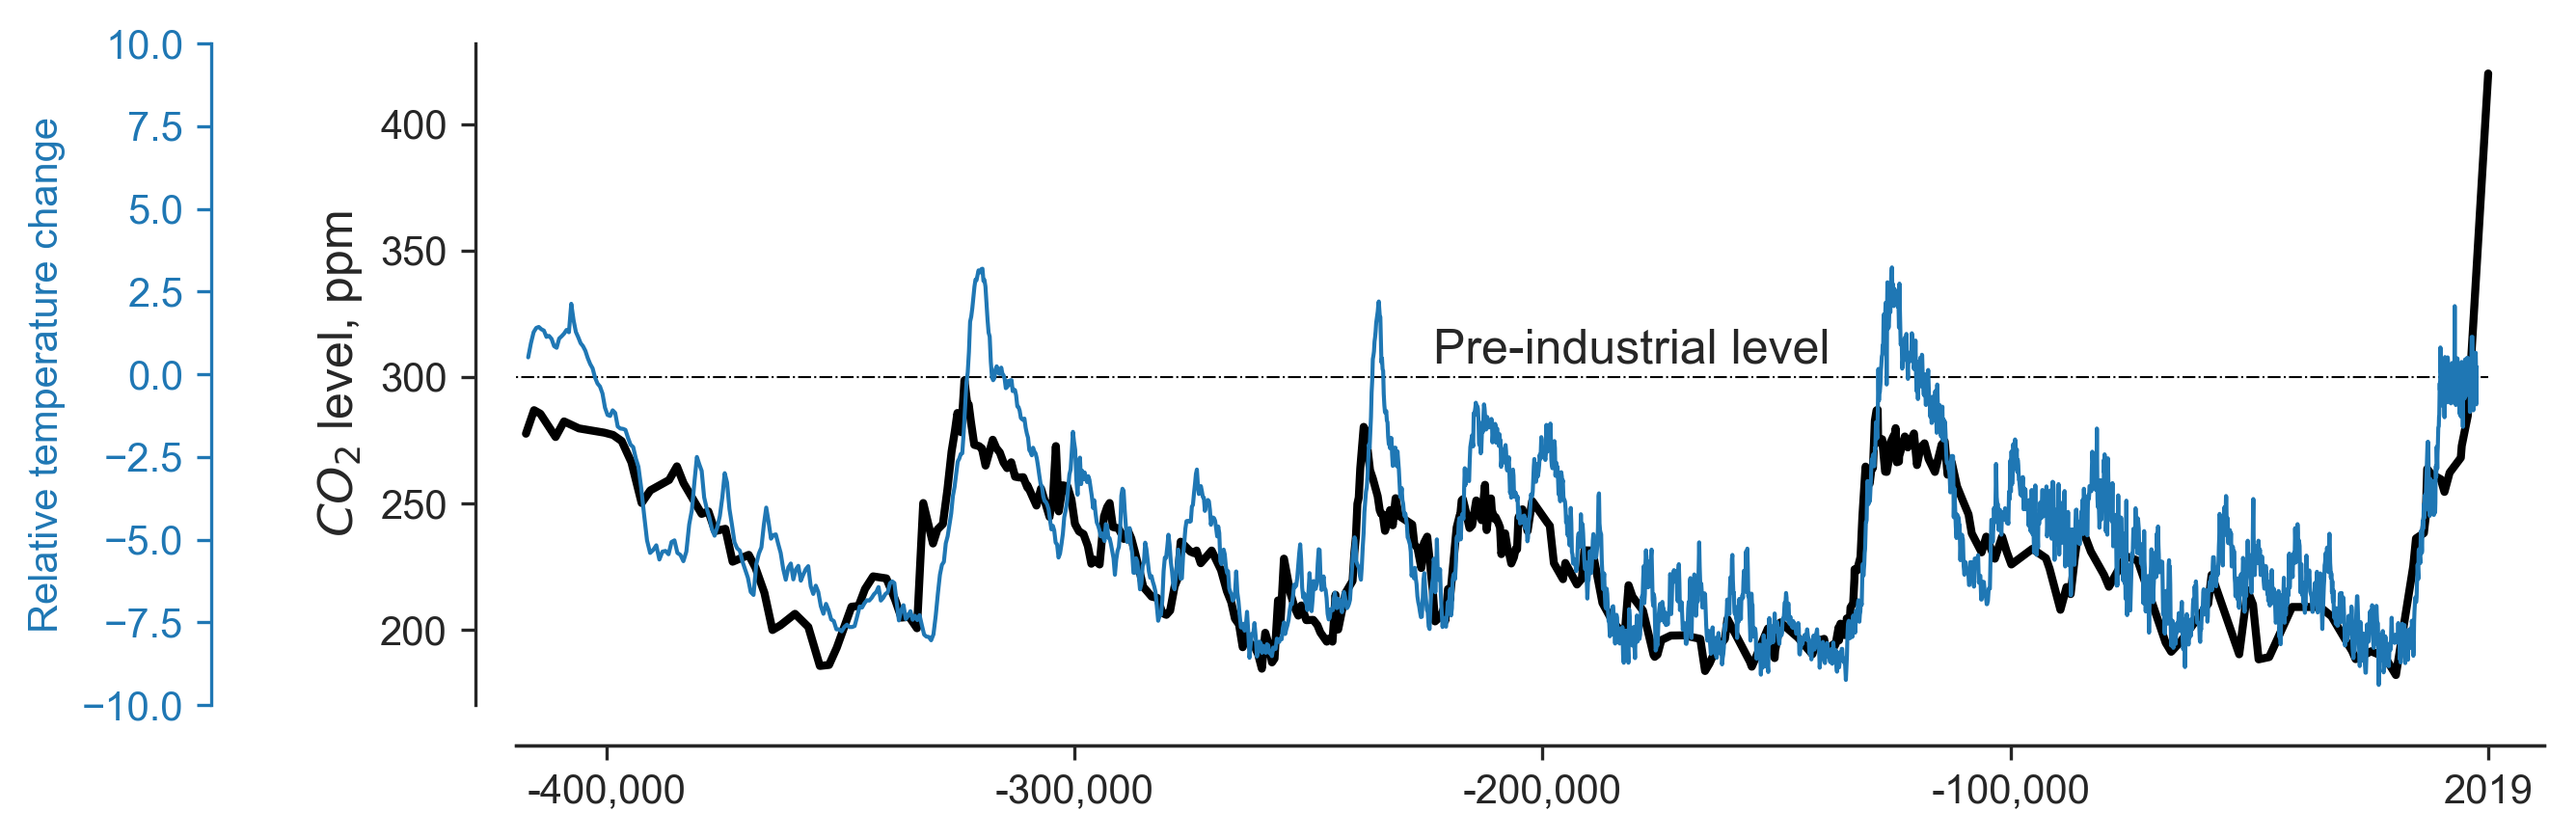

In [29]:
f, ax = plt.subplots(1,1, figsize=(9,3), dpi=300, sharex=True)
sns.lineplot(x=-vostok['air age'], y=vostok['co2 ppv'], c='k', lw=2)
ax.set_ylabel('$CO_2$ level, ppm', fontsize='large')
ax.set_xlabel('')
ax.set_xlim(-419328,14000)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax2=ax.twinx()
ax2.spines["left"].set_position(("axes", -0.1)) # green one
ax2.spines["left"].set_visible(True)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks_position('left')
ax2.spines['left'].set_color(sns.color_palette()[0])
ax2.xaxis.label.set_color(sns.color_palette()[0])
ax2.tick_params(axis='y', colors=sns.color_palette()[0])

shift = 100
shift_2 = 5
sns.lineplot(x=(-vostok_T['Ice age (GT4)']+3000)[shift:-shift_2], y=vostok_T['deltaTS'][shift:-shift_2], c=sns.color_palette()[0], lw=1, ax=ax2)
ax2.set_ylabel('Relative temperature change', color=sns.color_palette()[0])
ax2.set_ylim(-10,10)
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='x-large')

plt.xlabel('Years before 1950')
ax.hlines(300,-5e5,2e3,linestyle='-.' ,lw=0.5)

props = dict(boxstyle='square', facecolor='white', alpha=0., edgecolor='white')
ax.text(0.55, 0.57, 'Pre-industrial level', transform=ax.transAxes,verticalalignment='top', horizontalalignment='center', bbox=props, fontsize='large')
# ax.text(0.01, 0.45, 'Michigan-Huron', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
# ax.text(0.01, 0.28, 'St. Clair', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
# ax.text(0.03, 0.15, 'Erie', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')

# ax.text(0.8, 0.97, '$r=0.38$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')
# ax.text(0.8, 0.4, '$r=0.82$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')
# ax.text(0.8, 0.29, '$r=0.96$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')

plt.xticks([-4e5,-3e5,-2e5,-1e5,2019], ['-400,000', '-300,000', '-200,000', '-100,000', '2019', ])

# plt.legend(loc=(0.6,0.45),frameon=0)
sns.despine(offset=10)

ax2.spines["left"].set_position(("axes", -0.15)) # green one

plt.tight_layout()

plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Thesis/thesis_latex/introduction/img/ice_core_2.pdf', dpi=f.dpi)

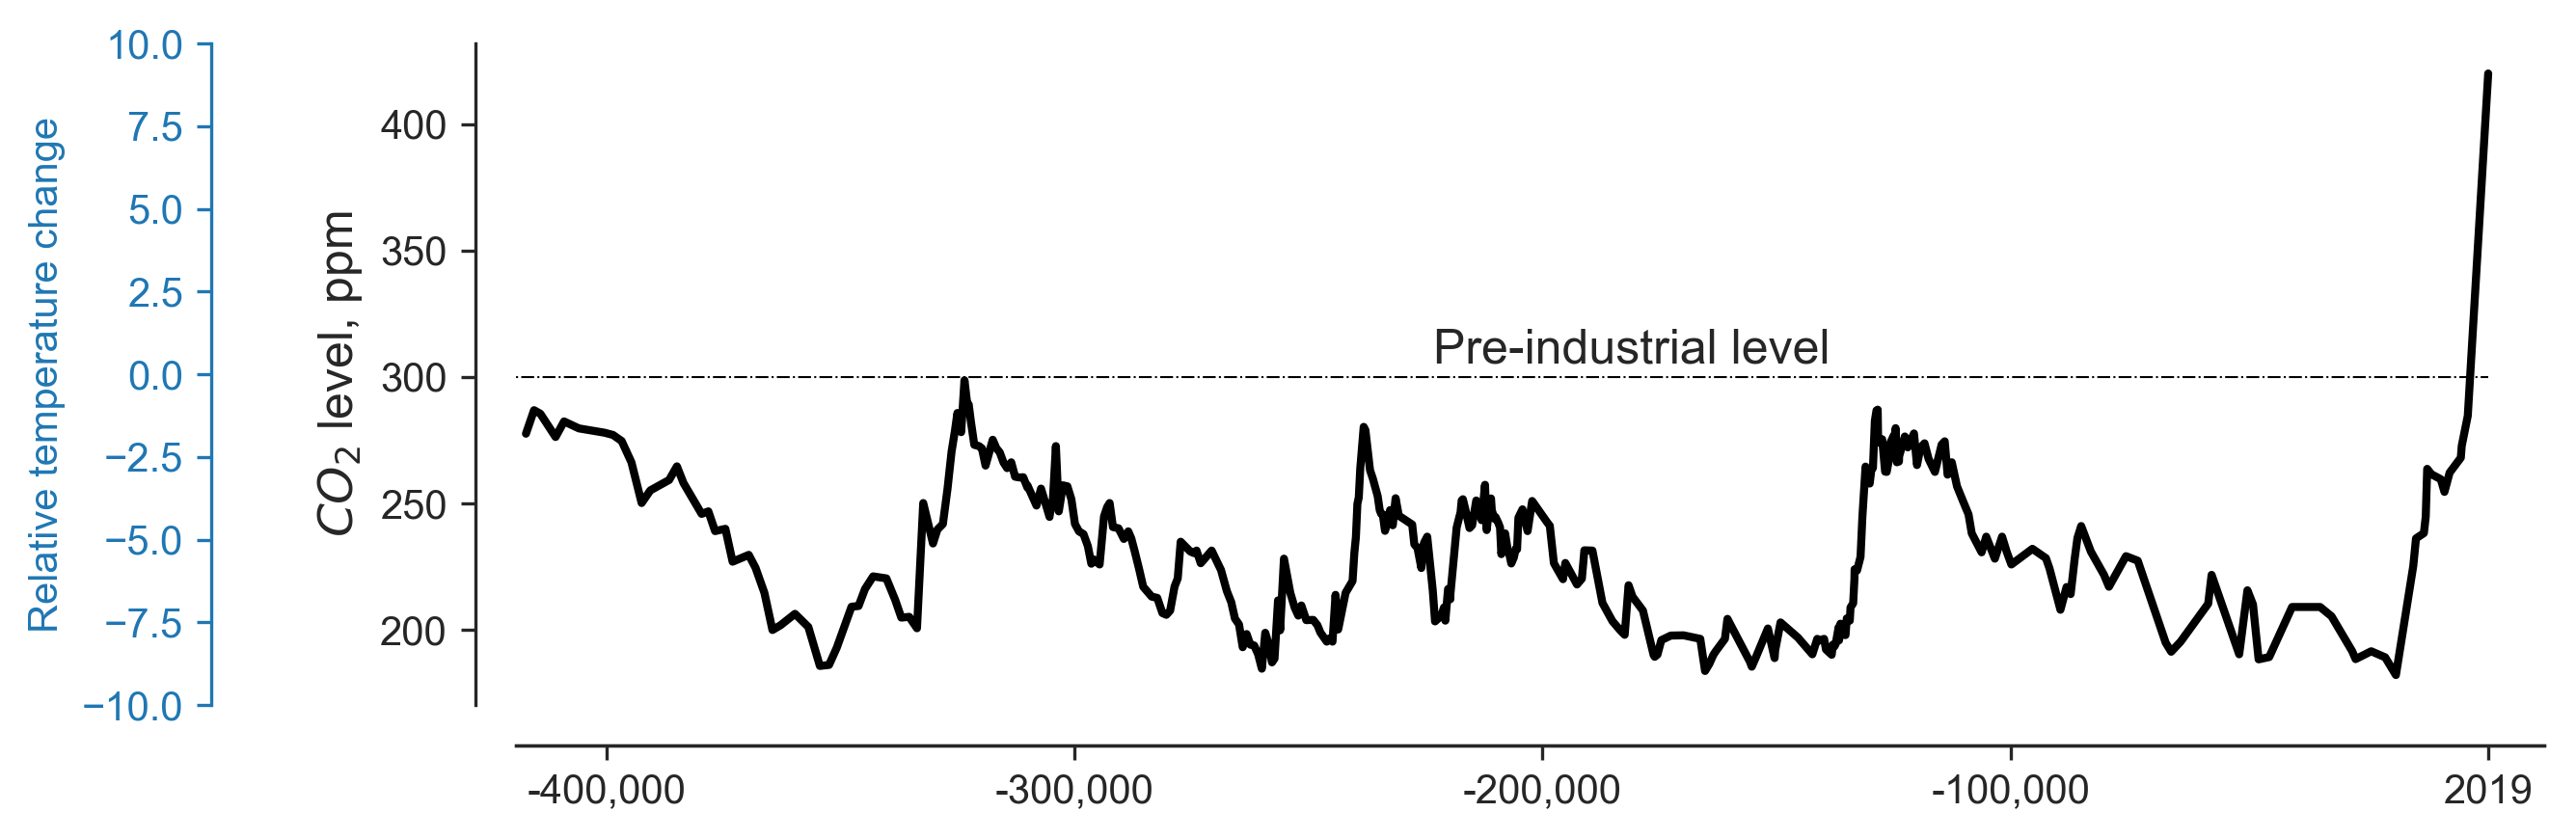

In [30]:
f, ax = plt.subplots(1,1, figsize=(9,3), dpi=300, sharex=True)
sns.lineplot(x=-vostok['air age'], y=vostok['co2 ppv'], c='k', lw=2)
ax.set_ylabel('$CO_2$ level, ppm', fontsize='large')
ax.set_xlabel('')
ax.set_xlim(-419328,14000)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax2=ax.twinx()
ax2.spines["left"].set_position(("axes", -0.1)) # green one
ax2.spines["left"].set_visible(True)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks_position('left')
ax2.spines['left'].set_color(sns.color_palette()[0])
ax2.xaxis.label.set_color(sns.color_palette()[0])
ax2.tick_params(axis='y', colors=sns.color_palette()[0])


sns.lineplot(x=-vostok_T['Ice age (GT4)'], y=vostok_T['deltaTS'], c=sns.color_palette()[0], alpha=0, lw=1, ax=ax2)
ax2.set_ylabel('Relative temperature change', color=sns.color_palette()[0])
ax2.set_ylim(-10,10)
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='x-large')

plt.xlabel('Years before 1950')
ax.hlines(300,-5e5,2e3,linestyle='-.' ,lw=0.5)

props = dict(boxstyle='square', facecolor='white', alpha=0., edgecolor='white')
ax.text(0.55, 0.57, 'Pre-industrial level', transform=ax.transAxes,verticalalignment='top', horizontalalignment='center', bbox=props, fontsize='large')
# ax.text(0.01, 0.45, 'Michigan-Huron', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
# ax.text(0.01, 0.28, 'St. Clair', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
# ax.text(0.03, 0.15, 'Erie', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')

# ax.text(0.8, 0.97, '$r=0.38$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')
# ax.text(0.8, 0.4, '$r=0.82$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')
# ax.text(0.8, 0.29, '$r=0.96$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')

plt.xticks([-4e5,-3e5,-2e5,-1e5,2019], ['-400,000', '-300,000', '-200,000', '-100,000', '2019', ])

# plt.legend(loc=(0.6,0.45),frameon=0)
sns.despine(offset=10)

ax2.spines["left"].set_position(("axes", -0.15)) # green one

plt.tight_layout()

plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Thesis/thesis_latex/introduction/img/ice_core.pdf', dpi=f.dpi)

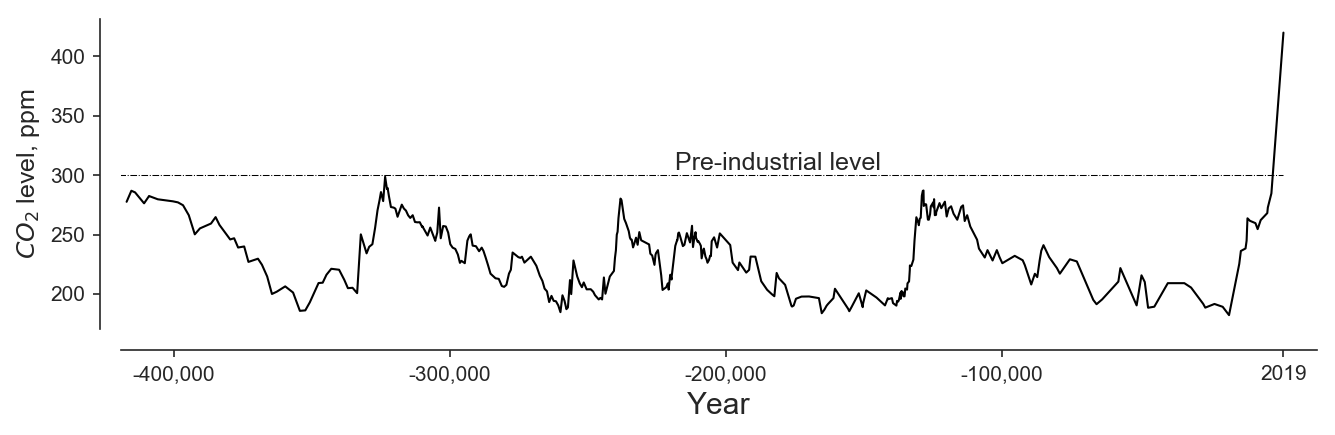

In [139]:
f, ax = plt.subplots(1,1, figsize=(9,3), dpi=150, sharex=True)
sns.lineplot(x=-vostok['air age'], y=vostok['co2 ppv'], c='k', lw=1)
ax.set_ylabel('$CO_2$ level, ppm', fontsize='large')
ax.set_xlabel('')
ax.set_xlim(-419328,14000)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax2=ax.twinx()
# ax2.spines["left"].set_position(("axes", -0.1)) # green one
# ax2.spines["left"].set_visible(True)
# ax2.spines["right"].set_visible(False)
# ax2.spines["top"].set_visible(False)
# ax2.yaxis.set_label_position('left')
# ax2.yaxis.set_ticks_position('left')
# ax2.spines['left'].set_color(sns.color_palette()[0])
# ax2.xaxis.label.set_color(sns.color_palette()[0])
# ax2.tick_params(axis='y', colors=sns.color_palette()[0])


sns.lineplot(x=-vostok_T['Ice age (GT4)'], y=vostok_T['deltaTS'], c=sns.color_palette()[0], lw=1, ax=ax2)
ax2.set_ylabel('Relative temperature change', color=sns.color_palette()[0])
ax2.set_ylim(-10,10)
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='x-large')

plt.xlabel('Year', fontsize='x-large')
ax.hlines(300,-5e5,2e3,linestyle='-.' ,lw=0.5)

props = dict(boxstyle='square', facecolor='white', alpha=0., edgecolor='white')
ax.text(0.55, 0.57, 'Pre-industrial level', transform=ax.transAxes,verticalalignment='top', horizontalalignment='center', bbox=props, fontsize='large')
# ax.text(0.01, 0.45, 'Michigan-Huron', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
# ax.text(0.01, 0.28, 'St. Clair', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
# ax.text(0.03, 0.15, 'Erie', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')

# ax.text(0.8, 0.97, '$r=0.38$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')
# ax.text(0.8, 0.4, '$r=0.82$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')
# ax.text(0.8, 0.29, '$r=0.96$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')

plt.xticks([-4e5,-3e5,-2e5,-1e5,2019], ['-400,000', '-300,000', '-200,000', '-100,000', '2019', ])

# plt.legend(loc=(0.6,0.45),frameon=0)
sns.despine(offset=10)

ax2.spines["left"].set_position(("axes", -0.15)) # green one

plt.tight_layout()

plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Thesis/thesis_latex/introduction/img/ice_core_c.pdf', dpi=f.dpi)
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_draft/img/water_level.pdf', dpi=f.dpi)